In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [5]:
path = "F:\\for learn\\Python_MachineLearning\\"
colnames = ["Class label",
            "Alcohol", 
            "Malic acid", 
            "Ash", 
            "Alcalinity of ash", 
            "Magnesium", 
            "Total phenols",
            "Flavanoids",
            "Nonflavanoid phenols",
            "Proanthocyanins",
            "Color intensity",
            "Hue",
            "OD280/OD315 of diluted wines",
            "Proline"]
df_wine = pd.read_csv(path + "wine.data", header=None, names=colnames)

In [12]:
X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [14]:
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [33]:
eig_values, eig_vecs = np.linalg.eig(np.cov(X_train_std.T))
sortMask = (-eig_values).argsort()
eig_vecs_sorted = eig_vecs[sortMask]
eig_values_sorted = eig_values[sortMask]

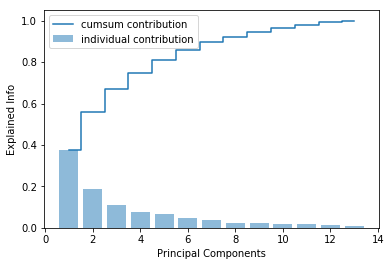

In [34]:
tot = sum(eig_values)
var_exp = [(i / tot) for i in eig_values_sorted]
cum_var_exp = np.cumsum(var_exp)
num = len(eig_values)
plt.bar(range(1, 1 + num), 
        var_exp, 
        alpha=0.5, 
        align='center', 
        label='individual contribution')
plt.step(range(1, 1 + num), 
         cum_var_exp,
         where='mid', 
         label='cumsum contribution')
plt.xlabel('Principal Components')
plt.ylabel('Explained Info')
plt.legend(loc='upper left')
plt.show()

In [77]:
K = 2
W = np.mat(eig_vecs_sorted[:K]).T
X_train_pca = (X_train_std * W).A

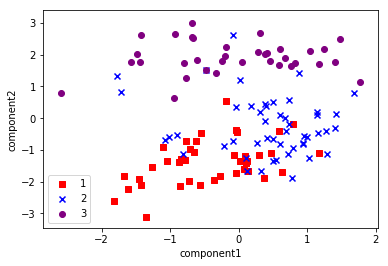

In [78]:
colors = ['red', 'blue', 'purple']
markers = ['s', 'x', 'o']
for label, color, marker in zip(np.unique(y), colors, markers):
    plt.scatter(x=X_train_pca[y_train == label, 0], 
                y=X_train_pca[y_train == label, 1], 
                c=color, marker=marker, label=label)
plt.xlabel('component1')
plt.ylabel('component2')
plt.legend(loc="lower left")
plt.show()

In [85]:
from matplotlib.colors import ListedColormap
def plot_decision_regions(x, y, classifier, title=None, test_idx=None, resolution=0.02):
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors=colors[:len(np.unique(y))])
    # plot decision surface
    x1_min, x1_max = x[:, 0].min() - 1, x[:, 0].max() + 1
    x2_min, x2_max = x[:, 1].min() - 1, x[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), 
                           np.arange(x2_min, x2_max, resolution))
    z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T).reshape(xx1.shape)
    plt.contourf(xx1, xx2, z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    # plot samples
    x_test, y_test = x[test_idx, :], y[test_idx]
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=x[y == cl, 0], 
                    y=x[y == cl, 1], 
                    alpha=0.8, 
                    c=cmap(idx),marker=markers[idx],
                    label=cl)
    # highlight test samples
    if test_idx:# not test_idx == None
        plt.scatter(x_test[:, 0],
                    x_test[:, 1],
                    c='black',
                    alpha=1.0, 
                    linewidth=1, 
                    marker='o',
                    s=55,
                    label='test set')
    if title:
        plt.title(title)

In [82]:
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA

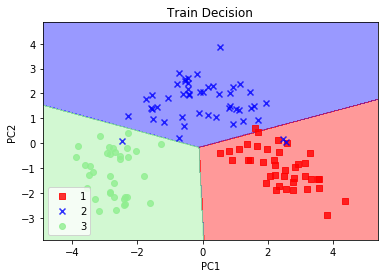

In [88]:
pca = PCA(n_components=2)
lr = LogisticRegression()
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)
lr.fit(X_train_pca, y_train)
# 描绘决策区域，并展示训练集
plot_decision_regions(x=X_train_pca, y=y_train, title="Train Decision", classifier=lr)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(loc="lower left")
plt.show()

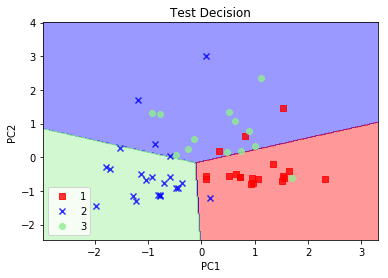

In [89]:
# 描绘决策区域，并展示测试集
plot_decision_regions(x=X_test_std, y=y_test, title="Test Decision", classifier=lr)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(loc="lower left")
plt.show()

In [90]:
print(pca.explained_variance_ratio_)

[ 0.37329648  0.18818926]
